In [2]:
%load_ext autoreload
%autoreload 2

import open3d as o3d
import numpy as np
import copy
from os import listdir
import os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

from winsound import Beep
import math
import alexutils as alx
from datetime import datetime

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [82]:
# source = r"C:\Users\amoff\Documents\Meine Textdokumente\Masterarbeit\Daten\new_try\registered_pcds\merged_vehicle_frames_kiss_icp_no_ground_registered_normalized.pcd"
# target = r"C:\Users\amoff\Documents\Meine Textdokumente\Masterarbeit\Daten\new_try\registered_pcds\intersection_drone_no_ground_registered_normalized.pcd"




source = r"C:\Users\amoff\Documents\Meine Textdokumente\Masterarbeit\Daten\new_try\registered_pcds\merged_vehicle_frames_kiss_icp_no_ground_registered.pcd"
target = r"C:\Users\amoff\Documents\Meine Textdokumente\Masterarbeit\Daten\new_try\registered_pcds\intersection_drone_no_ground_registered.pcd"

source = r"C:\Users\amoff\Documents\Meine Textdokumente\Masterarbeit\Daten\new_try\registered_pcds\merged_vehicle_frames_kiss_icp_with_ground_registered.pcd"
target = r"C:\Users\amoff\Documents\Meine Textdokumente\Masterarbeit\Daten\new_try\registered_pcds\intersection_drone_with_ground_registered.pcd"

# source = r"C:\Users\amoff\Documents\Meine Textdokumente\Masterarbeit\Daten\new_try\registered_pcds\selected_frames\1667908110_000000000.pcd"
# target = r"C:\Users\amoff\Documents\Meine Textdokumente\Masterarbeit\Daten\new_try\registered_pcds\selected_frames\1667908110_100000000.pcd"

source = o3d.io.read_point_cloud(source)
target = o3d.io.read_point_cloud(target)

target = alx.crop(target, 2, 0, 10)
source = alx.crop(source, 2, 0, 10)

voxel_size = 1

# source, target = alx.pc_norm(source, target)
source = source.voxel_down_sample(voxel_size)
target = target.voxel_down_sample(voxel_size)

alx.draw_point_clouds([target, source])


target_down, target_fpfh = alx.preprocess_point_cloud(target, voxel_size)

alx.draw_point_clouds([source, target_down])

In [4]:
def calculate_mean_error(source, target, target_down, target_fpfh, voxel_size, method, radius, cache, max_correspondence_distance=10):
    mean_t_error = []
    mean_r_error = []
    for x, y in alx.get_circular_coordinates(radius, 5):
        translation = [x,y,0]
        temp_frame = copy.deepcopy(source)

        temp_frame.translate(translation)
        ground_truth_rotation = alx.rotate(temp_frame, 0,0,0)

        # if str(translation) not in cache:
        #     cache[str(translation)] = alx.preprocess_point_cloud(temp_frame, voxel_size)

        # source_down, source_fpfh = cache[str(translation)]
        
        
        
        if method == "p2p":
            evaluation = alx.compute_icp_p2p(temp_frame, target)
        
        if method == "p2plane":
            evaluation = alx.compute_icp_p2plane(temp_frame, target_down)
        
        if method == "global":
            evaluation = alx.compute_global_registration_ransac(source_down, target_down, source_fpfh, target_fpfh, voxel_size)


        if method == "fast":
            evaluation = alx.compute_fast_global_registration(temp_frame, target_down, source_fpfh, target_fpfh, voxel_size)
        
        if method == "multiscale":
            evaluation = alx.compute_my_multiscale_registration(temp_frame, target)
        
        if "generalized" in method:
            evaluation = alx.compute_generalized_icp(temp_frame,target)


        robust_losses = { "L2Loss":1 , "L1Loss":2, "TukeyLoss":0, "HuberLoss":3, "CauchyLoss":4, "GMLoss":5}
        if method in robust_losses:
            evaluation = alx.compute_robust_registration(source_down,target_down, robust_losses[method])
        
        
        if method == "TukeyLoss_k_0.1":
            evaluation = alx.compute_robust_registration(source_down,target_down, 0, k = 0.1)
        if method == "TukeyLoss_k_0.5":
            evaluation = alx.compute_robust_registration(source_down,target_down, 0, k = 0.5)
        if method == "TukeyLoss_k_1":
            evaluation = alx.compute_robust_registration(source_down,target_down, 0, k = 1)
        if method == "TukeyLoss_k_2":
            evaluation = alx.compute_robust_registration(source_down,target_down, 0, k = 2)
        if method == "TukeyLoss_k_5":
            evaluation = alx.compute_robust_registration(source_down,target_down, 0, k = 5)
        if method == "TukeyLoss_k_10":
            evaluation = alx.compute_robust_registration(source_down,target_down, 0, k = 10)
        if method == "TukeyLoss_k_20":
            evaluation = alx.compute_robust_registration(source_down,target_down, 0, k = 20)
        if method == "TukeyLoss_k_3":
            evaluation = alx.compute_robust_registration(source_down,target_down, 0, k = 3)

        if method == "HuberLoss_k_0.1":
            evaluation = alx.compute_robust_registration(source_down,target_down, 3, k = 0.1)
        if method == "HuberLoss_k_0.5":
            evaluation = alx.compute_robust_registration(source_down,target_down, 3, k = 0.5)
        if method == "HuberLoss_k_1":
            evaluation = alx.compute_robust_registration(source_down,target_down, 3, k = 1)
        if method == "HuberLoss_k_2":
            evaluation = alx.compute_robust_registration(source_down,target_down, 3, k = 2)
        if method == "HuberLoss_k_5":
            evaluation = alx.compute_robust_registration(source_down,target_down, 3, k = 5)
        if method == "HuberLoss_k_10":
            evaluation = alx.compute_robust_registration(source_down,target_down, 3, k = 10)
        if method == "HuberLoss_k_20":
            evaluation = alx.compute_robust_registration(source_down,target_down, 3, k = 20)
        if method == "HuberLoss_k_3":
            evaluation = alx.compute_robust_registration(source_down,target_down, 3, k = 3)

        if method == "p2p_max_corr_dist_0.1":
            evaluation = alx.compute_icp_p2p(temp_frame, target, max_correspondence_distance, 0.1)
        if method == "p2p_max_corr_dist_0.5":
            evaluation = alx.compute_icp_p2p(temp_frame, target, max_correspondence_distance, 0.5)
        if method == "p2p_max_corr_dist_1":
            evaluation = alx.compute_icp_p2p(temp_frame, target, max_correspondence_distance, 1)
        if method == "p2p_max_corr_dist_2":
            evaluation = alx.compute_icp_p2p(temp_frame, target, max_correspondence_distance, 2)
        if method == "p2p_max_corr_dist_3":
            evaluation = alx.compute_icp_p2p(temp_frame, target, max_correspondence_distance, 2)
        if method == "p2p_max_corr_dist_5":
            evaluation = alx.compute_icp_p2p(temp_frame, target, max_correspondence_distance, 5)
        if method == "p2p_max_corr_dist_10":
            evaluation = alx.compute_icp_p2p(temp_frame, target, max_correspondence_distance, 10)
        if method == "p2p_max_corr_dist_20":
            evaluation = alx.compute_icp_p2p(temp_frame, target, max_correspondence_distance, 20)
        if method == "p2p_max_corr_dist_30":
            evaluation = alx.compute_icp_p2p(temp_frame, target, max_correspondence_distance, 30)

        # temp_frame.transform(evaluation.transformation)
        # alx.draw_point_clouds([target, temp_frame])
        t_error, r_error = alx.compute_relative_errors(translation, ground_truth_rotation, evaluation.transformation)
        mean_t_error.append(t_error)
        mean_r_error.append(r_error)
    mean_t_error = np.array(mean_t_error).mean()
    mean_r_error = np.array(mean_r_error).mean()
    return (mean_t_error, mean_r_error)

In [4]:
def calculate_mean_error_normalized(method, radius):
    mean_t_error = []
    mean_r_error = []
    for x, y in alx.get_circular_coordinates(radius, 5):
        translation = [x,y,0]
        temp_frame = copy.deepcopy(source)

        temp_frame.translate(translation)
        ground_truth_rotation = alx.rotate(temp_frame, 0,0,0)
        
        max_corr_dist = voxel_size * 3
        if method == "p2p":
            evaluation = alx.compute_icp_p2p(temp_frame, target, max_corr_dist)
        
        if method == "p2plane":
            evaluation = alx.compute_icp_p2plane(temp_frame, target_down, max_corr_dist)
        
        if method == "global":
            evaluation = alx.compute_global_registration_ransac(source_down, target_down, source_fpfh, target_fpfh, max_corr_dist)
        
        if method == "fast":
            evaluation = alx.compute_fast_global_registration(temp_frame, target_down, source_fpfh, target_fpfh, max_corr_dist)
        
        if method == "multiscale":
            evaluation = alx.compute_my_multiscale_registration(source, target)
        
        if method == "generalized":
            evaluation = alx.compute_generalized_icp(source,target, max_corr_dist)

        if  method == "TukeyLoss": 
            evaluation = alx.compute_robust_registration(source_down,target_down, 0, max_corr_dist)

        if method == "L2Loss": 
            evaluation = alx.compute_robust_registration(source_down,target_down, 1, max_corr_dist)

        if method == "L1Loss": 
            evaluation = alx.compute_robust_registration(source_down,target_down, 2, max_corr_dist)

        if method == "HuberLoss": 
            evaluation = alx.compute_robust_registration(source_down,target_down, 3, max_corr_dist)

        if method == "CauchyLoss": 
            evaluation = alx.compute_robust_registration(source_down,target_down, 4, max_corr_dist)

        if method == "GMLoss":
            evaluation = alx.compute_robust_registration(source_down,target_down, 5, max_corr_dist)

        # temp_frame.transform(evaluation.transformation)
        # alx.draw_point_clouds([target, temp_frame])
        t_error, r_error = alx.compute_relative_errors(translation, ground_truth_rotation, evaluation.transformation)
        mean_t_error.append(t_error)
        mean_r_error.append(r_error)
    mean_t_error = np.array(mean_t_error).mean()
    mean_r_error = np.array(mean_r_error).mean()
    return (mean_t_error, mean_r_error)

In [11]:
frame_names = ["1667908110_000000000.pcd", "1667908115_000000000.pcd","1667908120_000000000.pcd", "1667908125_000000000.pcd","1667908130_000000000.pcd", "1667908135_000000000.pcd","1667908140_000000000.pcd", "1667908145_000000000.pcd","1667908150_000000000.pcd", "1667908155_000000000.pcd",]
frame_names = frame_names[9:]

for idx, frame_name in enumerate(frame_names):
    target = r"C:\Users\amoff\Documents\Meine Textdokumente\Masterarbeit\Daten\new_try\registered_pcds\intersection_drone_no_ground_registered.pcd"
    source_folder = r"C:\Users\amoff\Documents\Meine Textdokumente\Masterarbeit\Daten\new_try\pcd_registered_10_frames\\"
    source = source_folder + frame_name

    source = o3d.io.read_point_cloud(source)
    target = o3d.io.read_point_cloud(target)
    voxel_size = 1

    # source, target = alx.pc_norm(source, target)
    source = source.voxel_down_sample(voxel_size)
    target = target.voxel_down_sample(voxel_size)
    target_down, target_fpfh = alx.preprocess_point_cloud(target, voxel_size)

    alx.draw_point_clouds([target,source])

In [ ]:
frame_names = ["1667908110_000000000.pcd", "1667908115_000000000.pcd","1667908120_000000000.pcd", "1667908125_000000000.pcd","1667908130_000000000.pcd", "1667908135_000000000.pcd","1667908140_000000000.pcd", "1667908145_000000000.pcd","1667908150_000000000.pcd", "1667908155_000000000.pcd",]

for idx, frame_name in enumerate(frame_names):
    target = r"C:\Users\amoff\Documents\Meine Textdokumente\Masterarbeit\Daten\new_try\registered_pcds\intersection_drone_no_ground_registered.pcd"
    source_folder = r"C:\Users\amoff\Documents\Meine Textdokumente\Masterarbeit\Daten\new_try\pcd_registered_10_frames\\"
    source = source_folder + frame_name

    source = o3d.io.read_point_cloud(source)
    target = o3d.io.read_point_cloud(target)
    voxel_size = 1

    # source, target = alx.pc_norm(source, target)
    source = source.voxel_down_sample(voxel_size)
    target = target.voxel_down_sample(voxel_size)
    target_down, target_fpfh = alx.preprocess_point_cloud(target, voxel_size)

    # alx.draw_point_clouds([target,source])

    max_correspondence_distance = 10
    # methods = ["p2p_max_corr_dist_0.1","p2p_max_corr_dist_0.5","p2p_max_corr_dist_1","p2p_max_corr_dist_2","p2p_max_corr_dist_5","p2p_max_corr_dist_10","p2p_max_corr_dist_20","p2p_max_corr_dist_30",]
    methods = ["p2p", "p2plane", "generalized", "multiscale", "TukeyLoss", "L2Loss", "L1Loss", "HuberLoss", "CauchyLoss", "GMLoss","global", "fast",]
    # methods = ["p2p", "p2plane", "generalized", "TukeyLoss", "L2Loss", "L1Loss", "HuberLoss", "CauchyLoss", "GMLoss", "fast"]
    # methods = ["p2p", "p2plane", "multiscale", "generalized", "TukeyLoss", "L2Loss", "L1Loss", "HuberLoss", "CauchyLoss", "GMLoss"]
    # methods = ["p2p", "L2Loss",] # "L2Loss", "L1Loss", "HuberLoss", "CauchyLoss", "GMLoss"]
    # methods = [ "multiscale"] #, "generalized", "TukeyLoss", "L2Loss", "L1Loss", "HuberLoss", "CauchyLoss", "GMLoss"]
    # lossname="Huber"
    # methods = [lossname+"Loss_k_0.1", lossname+"Loss_k_1", lossname+"Loss_k_5", lossname+"Loss_k_10",lossname+"Loss_k_20",lossname+"Loss_k_40",lossname+"Loss_k_80"]
    # methods = ["generalized"]
    # radii = np.array([1, 5, 10, 15, 20, 30])/269
    # methods = ["global_pt_max_it_1000000"]
    # methods = ["TukeyLoss_k_0.1","TukeyLoss_k_0.5","TukeyLoss_k_1","TukeyLoss_k_2","TukeyLoss_k_3","TukeyLoss_k_5","TukeyLoss_k_10","TukeyLoss_k_20",]
    # methods = ["HuberLoss_k_0.1","HuberLoss_k_0.5","HuberLoss_k_1","HuberLoss_k_2","HuberLoss_k_3","HuberLoss_k_5","HuberLoss_k_10","HuberLoss_k_20",]
    radii = [1, 5, 10, 15, 20, 30]
    suffix = "no_ground_drone_vox_1_single_frame_" + str(idx)  # + "_max_corr_dist_" + str(max_correspondence_distance)
    df_translation = pd.DataFrame({"method":methods})
    df_rotation = pd.DataFrame({"method":methods})

    cache = {}
    for radius in radii:
        t_errors = []
        r_errors = []
        for method in methods:
            print(f"{method} {radius}")
            t_error, r_error = calculate_mean_error(source, target, target_down, target_fpfh, voxel_size, method, cache=cache, radius = radius, max_correspondence_distance=max_correspondence_distance)
            t_errors.append(t_error)
            r_errors.append(r_error)
        df_translation["Radius " + str(radius)] = t_errors
        df_rotation["Radius " + str(radius)] = r_errors

    date_time = datetime.now().strftime("%Y_%m_%d_%H_%M_%S")

    translation_file_path = r"C:\Users\amoff\Documents\Meine Textdokumente\Masterarbeit\experiments\29\translation_error_"+date_time+"_"+suffix+".csv"
    rotation_file_path = r"C:\Users\amoff\Documents\Meine Textdokumente\Masterarbeit\experiments\29\rotation_error_"+date_time+"_"+suffix+".csv"
    df_translation.to_csv(translation_file_path)
    df_rotation.to_csv(rotation_file_path)

    generate_bar_plot_no_save(df_translation)



In [6]:
df_translation.to_csv(r"C:\Users\amoff\Documents\Meine Textdokumente\Masterarbeit\experiments\28\translation_error_"+date_time+"_"+suffix+".csv")
df_rotation.to_csv(r"C:\Users\amoff\Documents\Meine Textdokumente\Masterarbeit\experiments\28\rotation_error_"+date_time+"_"+suffix+".csv")

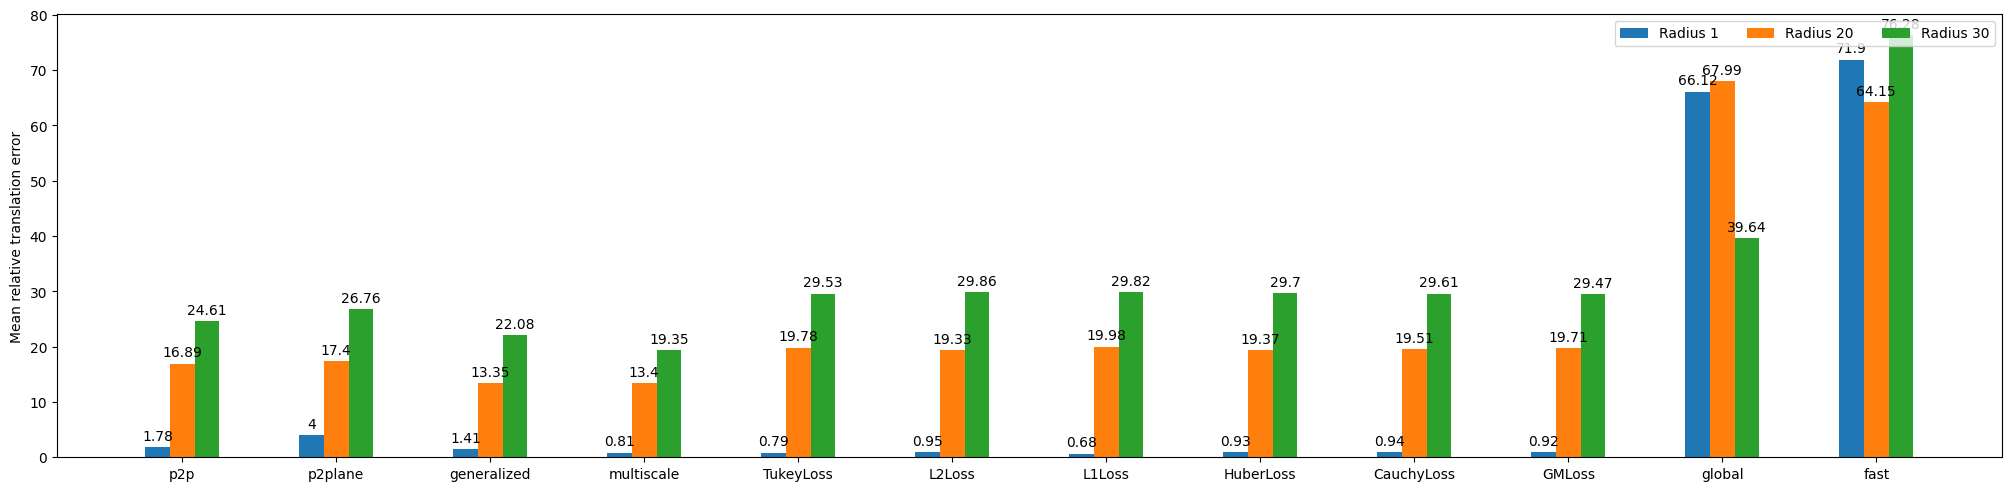

In [7]:
generate_bar_plot_no_save(df_translation)

In [5]:
def generate_bar_plot_no_save(df):
    species = df["method"].to_list()
    penguin_means = {}
    for c in df.columns[1:]:
        penguin_means[c] = [round(n, 2) for n in df[c]]

    x = np.arange(len(species))  # the label locations
    width = 0.16  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')
    fig.set_figwidth(20)

    for attribute, measurement in penguin_means.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=3)
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Mean translation error')
    ax.set_xticks(x + width, species)
    ax.legend(loc='upper right', ncols=6)
    # ax.set_ylim(0, 110)

    plt.show()

In [83]:
def generate_bar_plot(filename,  filename_fig, title, height = 100, barwidth = 0.16, figwidth=20 ):
    df = pd.read_csv(filename)
    species = df["method"].to_list()
    penguin_means = {}
    for c in df.columns[2:]:
        penguin_means[c] = [round(n, 2) for n in df[c]]

    x = np.arange(len(species))  # the label locations
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')
    # fig.tight_layout(pad=0.05)
    fig.set_figwidth(figwidth)

    

    for attribute, measurement in penguin_means.items():
        offset = barwidth * multiplier
        rects = ax.bar(x + offset, measurement, barwidth, label=attribute)
        ax.bar_label(rects, padding=3 ) #,label_type='center'
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Mean translation error [m]')
    ax.set_title(title)
    ax.set_xticks(x + barwidth, species)
    ax.legend(loc='upper right', ncols=6)
    ax.set_ylim(0, height)
    # ax.tick_params(labelsize=30)
    plt.xlim(ax.patches[0].get_x(), ax.patches[-1].get_x() + ax.patches[-1].get_width())

    plt.show()
    fig.savefig(r"C:\Users\amoff\Documents\Meine Textdokumente\Masterarbeit\Images\experiments\\"+filename_fig, format='eps')




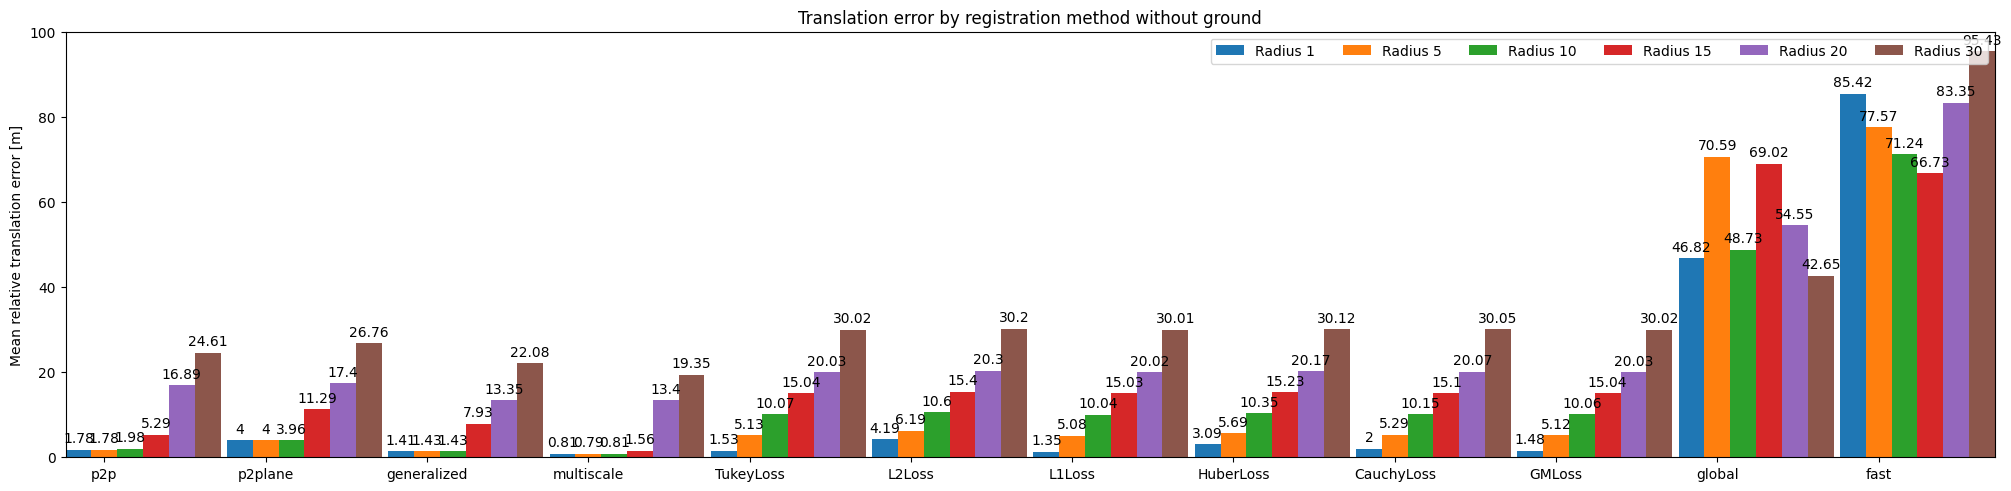

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [84]:
generate_bar_plot(r"C:\Users\amoff\Documents\Meine Textdokumente\Masterarbeit\experiments\28\translation_error_2023_10_25_01_36_22_no_ground_vox_1_all_methods_max_corr_dist_10.csv","mean_translation_error_no_ground_voxel_1.eps" , title='Translation error by registration method without ground')
# generate_bar_plot(r"C:\Users\amoff\Documents\Meine Textdokumente\Masterarbeit\experiments\28\translation_error_2023_10_23_19_19_09_no_ground_vox_1_max_corr_dist_test_p2p.csv","mean_translation_error_max_corr_dist_test.eps" , title='Translation error of Point to Point ICP with different max correspondence settings')
# * 269.2 generate_bar_plot(r"C:\Users\amoff\Documents\Meine Textdokumente\Masterarbeit\experiments\28\translation_error_2023_10_24_03_47_54_no_ground_vox_1_normalization_269_test.csv","mean_translation_error_no_ground_normalized.eps" , title='Mean translation error of normalized point clouds with different methods') 
# generate_bar_plot(r"C:\Users\amoff\Documents\Meine Textdokumente\Masterarbeit\experiments\28\translation_error_2023_10_24_04_47_18_no_ground_vox_1_huber_loss_k_test_max_corr_dist_10.csv","mean_translation_error_max_corr_10_huber_loss_test.eps" , title='Mean Translation error of robust ICP with different Huber loss parameter values and a max correspondence distance of 10', height = 50, barwidth=0.11, figwidth = 14)
# generate_bar_plot(r"C:\Users\amoff\Documents\Meine Textdokumente\Masterarbeit\experiments\28\translation_error_2023_10_24_04_47_48_no_ground_vox_1_huber_loss_k_test_max_corr_dist_20.csv","mean_translation_error_max_corr_20_huber_loss_test.eps" , title='Mean Translation error of robust ICP with different Huber loss parameter values and a max correspondence distance of 20', height = 80, barwidth=0.16, figwidth = 20)

In [85]:
df = pd.read_csv(r"C:\Users\amoff\Documents\Meine Textdokumente\Masterarbeit\experiments\28\translation_error_2023_10_25_01_36_22_no_ground_vox_1_all_methods_max_corr_dist_10.csv")

In [12]:
def generate_split_bar_plot(filename,  filename_fig, title, height = 100, barwidth = 0.16, figwidth=20, figheight=10):
    df = pd.read_csv(filename)
    
    half_count = int(len(df)/2+0.6)

    df1 = df.iloc[:half_count, :]
    df2 = df.iloc[half_count:, :]

    fig, (ax1, ax2) = plt.subplots(2,1, layout='constrained')
    fig.set_figwidth(figwidth)
    
    fig.set_figheight(figheight)



    def bar_plot(df, ax, idx):
        species = df["method"].to_list()
        penguin_means = {}
        for c in df.columns[2:]:
            penguin_means[c] = [round(n, 2) for n in df[c]]

        x = np.arange(len(species))  # the label locations
        multiplier = 0
        for attribute, measurement in penguin_means.items():
            offset = barwidth * multiplier
            rects = ax.bar(x + offset, measurement, barwidth, label=attribute)
            ax.bar_label(rects, padding=3 ) #,label_type='center'
            multiplier += 1

        # Add some text for labels, title and custom x-axis tick labels, etc.
        ax.set_ylabel('Mean translation error [m]')
        if idx == 1:
            ax.set_title(title)
        ax.set_xticks(x + barwidth, species)
        ax.legend(loc='upper right', ncols=6)
        ax.set_ylim(0, height)
        # ax.set_ylim(0, df.max(numeric_only=True).max()+20)
        # ax.tick_params(labelsize=30)
        # plt.xlim(ax.patches[0].get_x(), ax.patches[-1].get_x() + ax.patches[-1].get_width())
    
    # fig.text(-0.01, 0.5, 'Mean relative translation error [m]', va='center', rotation='vertical')
    bar_plot(df1, ax1, 1)
    bar_plot(df2, ax2, 2)

    plt.show()
    fig.savefig(r"C:\Users\amoff\Documents\Meine Textdokumente\Masterarbeit\Images\experiments\\"+filename_fig, format='eps')



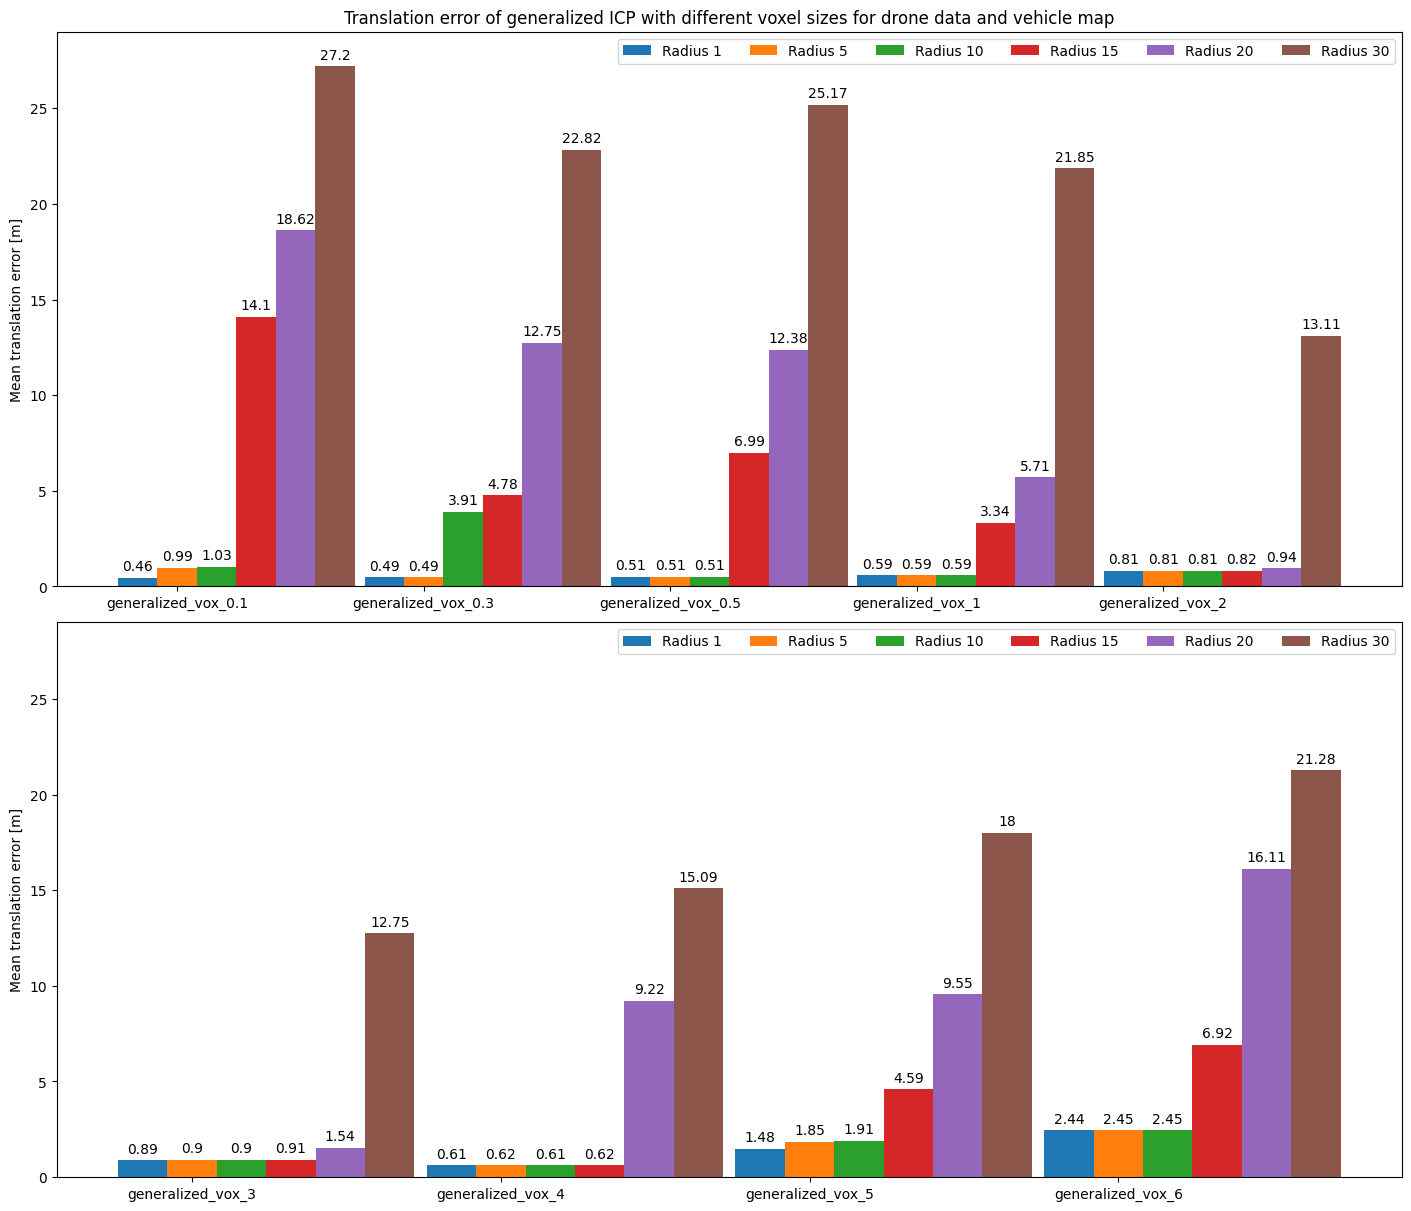

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [45]:
# generate_split_bar_plot(r"C:\Users\amoff\Documents\Meine Textdokumente\Masterarbeit\experiments\28\translation_error_2023_10_25_01_36_22_no_ground_vox_1_all_methods_max_corr_dist_10.csv","mean_translation_error_no_ground_voxel_1.eps" , title='Translation error by registration method without ground', height=110, figwidth=14, figheight=12)
# generate_split_bar_plot(r"C:\Users\amoff\Documents\Meine Textdokumente\Masterarbeit\experiments\28\translation_error_2023_10_23_03_18_17_with_ground_vox_1.csv","mean_translation_error_with_ground_voxel_1.eps" , title='Translation error by registration method with ground', height=95, figwidth=14, figheight=12)
# generate_split_bar_plot(r"C:\Users\amoff\Documents\Meine Textdokumente\Masterarbeit\experiments\28\translation_error_2023_10_27_02_20_59_no_ground_vox_1_Tukey_k_test.csv","mean_translation_error_no_ground_voxel_1_tukey_loss_k_test.eps" , title='Mean translation error by robust registration with Tukey loss and different k values', height=35, figwidth=14, figheight=12)
# generate_split_bar_plot(r"C:\Users\amoff\Documents\Meine Textdokumente\Masterarbeit\experiments\28\translation_error_2023_10_27_02_37_46_no_ground_vox_1_Huber_k_test.csv","mean_translation_error_no_ground_voxel_1_huber_loss_k_test.eps" , title='Mean translation error by robust registration with Tukey loss and different k values', height=35, figwidth=14, figheight=12)
# generate_split_bar_plot(r"C:\Users\amoff\Documents\Meine Textdokumente\Masterarbeit\experiments\29\translation_error_2023_10_27_03_00_18_no_ground_vox_1.csv","mean_translation_error_no_ground_voxel_1.eps" , title='Mean translation error of different registration methods', height=105, figwidth=14, figheight=12)
# generate_split_bar_plot(r"C:\Users\amoff\Documents\Meine Textdokumente\Masterarbeit\experiments\29\translation_error_2023_10_27_03_21_45_with_ground_vox_1.csv","mean_translation_error_with_ground_voxel_1.eps" , title='Mean translation error of different registration methods with ground present', height=105, figwidth=14, figheight=12)
# generate_split_bar_plot(r"C:\Users\amoff\Documents\Meine Textdokumente\Masterarbeit\experiments\29\translation_error_2023_10_27_03_40_23_with_ground_vox_1_consecutive_frames.csv","mean_translation_error_with_ground_voxel_1_consecutive_frames.eps" , title='Mean translation error of different registration methods for two consecutive frames', height=30, figwidth=14, figheight=12)
# generate_split_bar_plot(r"C:\Users\amoff\Documents\Meine Textdokumente\Masterarbeit\experiments\29\translation_error_2023_10_27_17_24_13_no_ground_vox_1_cropped_top_10.csv","mean_translation_error_no_ground_voxel_1_cropped_top_10.eps" , title='Mean translation error of different registration methods with no ground and a cropped points above 10m', height=75, figwidth=14, figheight=12)
# generate_split_bar_plot(r"C:\Users\amoff\Documents\Meine Textdokumente\Masterarbeit\experiments\28\translation_error_2023_10_23_19_19_09_no_ground_vox_1_max_corr_dist_test_p2p.csv","mean_translation_error_max_corr_dist_test.eps" , title="Translation error of Point to Point ICP with different max correspondence settings", height=35, figwidth=14, figheight=12)
# generate_split_bar_plot(r"C:\Users\amoff\Documents\Meine Textdokumente\Masterarbeit\experiments\29\translation_error_2023_10_31_13_51_23_no_ground_drone_vox_1_single_frame_0.csv","mean_translation_error_no_ground_vehicle_frame_1_drone.eps" , title="Translation error of different registration methods for vehicle frame 1 and drone data", height=198, figwidth=16, figheight=12)
# generate_split_bar_plot(r"C:\Users\amoff\Documents\Meine Textdokumente\Masterarbeit\experiments\29\translation_error_2023_10_31_13_54_50_no_ground_drone_vox_1_single_frame_9.csv","mean_translation_error_no_ground_vehicle_frame_10_drone.eps" , title="Translation error of different registration methods for vehicle frame 10 and drone data", height=80, figwidth=14, figheight=12)
generate_split_bar_plot(r"C:\Users\amoff\Documents\Meine Textdokumente\Masterarbeit\experiments\29\translation_error_2023_11_04_18_11_20_with_ground_generalized_voxel_test.csv","mean_translation_error_with_ground_generalized_voxel_test.eps" , title="Translation error of generalized ICP with different voxel sizes for drone data and vehicle map", height=29, figwidth=14, figheight=12)

Histograms

Number of points before filtering 3239041
Number of points after filtering 1394547
Reduction 56.94568237944503


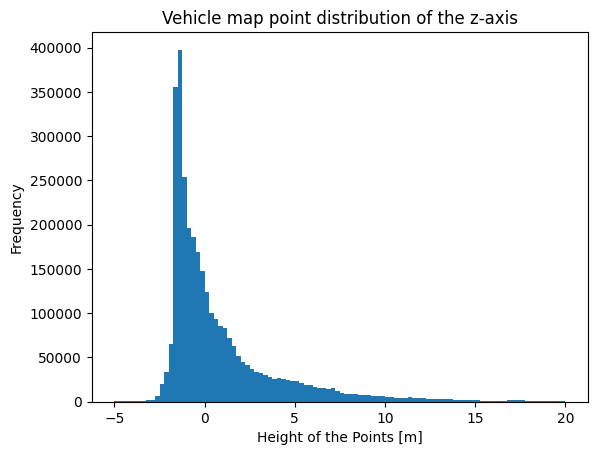

In [81]:
def generate_histogram(src_file, title, filename_fig):
    pcd = o3d.io.read_point_cloud(src_file)
    pcd_r =  alx.crop(pcd, lower_bound=-5, upper_bound=20)
    df = pd.DataFrame(np.asarray(pcd_r.points)[:,2])
    ax = df.plot(kind="hist", bins=100, legend=False, title=title)
    alx.remove_ground_with_infos(pcd, 0)
    fig = ax.get_figure()
    ax.set_xlabel("Height of the Points [m]")
    fig.savefig(r"C:\Users\amoff\Documents\Meine Textdokumente\Masterarbeit\Images\experiments\\"+filename_fig, format='eps')



# generate_histogram(src_file = r"C:\Users\amoff\Documents\Meine Textdokumente\Masterarbeit\Daten\new_try\registered_pcds\intersection_drone_with_ground_registered.pcd", title = "Drone map point distribution of the z-axis", filename_fig="histogram_drone_map.eps")
generate_histogram(src_file = r"C:\Users\amoff\Documents\Meine Textdokumente\Masterarbeit\Daten\new_try\registered_pcds\merged_vehicle_frames_kiss_icp_with_ground_registered.pcd", title = "Vehicle map point distribution of the z-axis", filename_fig="histogram_vehilce_map.eps")
# generate_histogram(src_file = r"C:\Users\amoff\Documents\Meine Textdokumente\Masterarbeit\Daten\new_try\pcd_registered_to_dirty2_no_downsample_with_ground\1667908110_000000000.pcd", title = "Vehicle frame point distribution of the z-axis", filename_fig="histogram_vehilce_frame.eps")

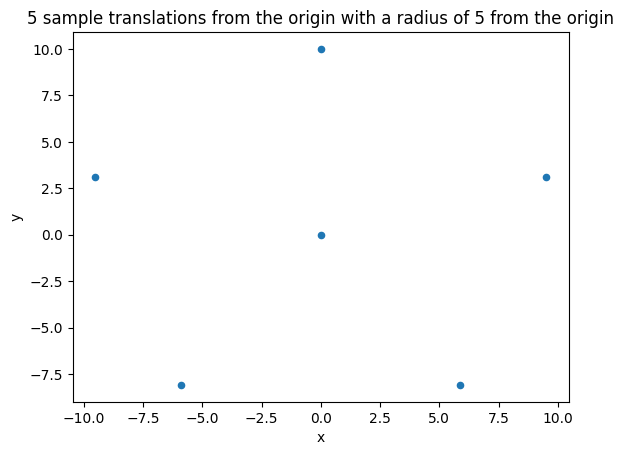

In [103]:
arr = alx.get_circular_coordinates(10, 5)
arr.append((0,0))
ax = pd.DataFrame(arr, columns=["x", "y"]).plot(kind="scatter", x="x", y="y", title="5 sample translations from the origin with a radius of 5 from the origin")
ax.get_figure().savefig(r"C:\Users\amoff\Documents\Meine Textdokumente\Masterarbeit\Images\experiments\sample_translations_for_experiments.eps", format='eps')

array([[ 0.        , 10.        ],
       [ 9.51056516,  3.09016994],
       [ 5.87785252, -8.09016994],
       [-5.87785252, -8.09016994],
       [-9.51056516,  3.09016994],
       [ 0.        ,  0.        ]])

In [28]:
for idx in range(4):
    arr = alx.get_circular_coordinates(15, 5)
    arr.append((0,0))
    arr = np.array([(x, y, 20 )for x, y in arr])




    source = r"C:\Users\amoff\Documents\Meine Textdokumente\Masterarbeit\Daten\new_try\registered_pcds\merged_vehicle_frames_kiss_icp_with_ground_registered.pcd"
    target = r"C:\Users\amoff\Documents\Meine Textdokumente\Masterarbeit\Daten\new_try\registered_pcds\intersection_drone_with_ground_registered.pcd"

    source_path = r"C:\Users\amoff\Documents\Meine Textdokumente\Masterarbeit\Daten\new_try\registered_pcds\merged_vehicle_frames_kiss_icp_no_ground_registered.pcd"
    target_path = r"C:\Users\amoff\Documents\Meine Textdokumente\Masterarbeit\Daten\new_try\registered_pcds\intersection_drone_no_ground_registered.pcd"

# source = r"C:\Users\amoff\Documents\Meine Textdokumente\Masterarbeit\Daten\new_try\registered_pcds\selected_frames\1667908110_000000000.pcd"
# target = r"C:\Users\amoff\Documents\Meine Textdokumente\Masterarbeit\Daten\new_try\registered_pcds\selected_frames\1667908110_100000000.pcd"



    source = o3d.io.read_point_cloud(source_path)
    target = o3d.io.read_point_cloud(target_path)


    source.translate((arr[idx][0], arr[idx][1], arr[idx][2] - 20))
    arr = alx.np_to_pcd(arr)
    arr.translate((-40, 5, 0))
    alx.draw_point_clouds([target, source, arr])

In [8]:


source_path = r"C:\Users\amoff\Documents\Meine Textdokumente\Masterarbeit\Daten\new_try\registered_pcds\merged_vehicle_frames_kiss_icp_no_ground_registered.pcd"
target_path = r"C:\Users\amoff\Documents\Meine Textdokumente\Masterarbeit\Daten\new_try\registered_pcds\intersection_drone_no_ground_registered.pcd"

source = r"C:\Users\amoff\Documents\Meine Textdokumente\Masterarbeit\Daten\new_try\registered_pcds\merged_vehicle_frames_kiss_icp_with_ground_registered.pcd"
target = r"C:\Users\amoff\Documents\Meine Textdokumente\Masterarbeit\Daten\new_try\registered_pcds\intersection_drone_with_ground_registered.pcd"

# source = r"C:\Users\amoff\Documents\Meine Textdokumente\Masterarbeit\Daten\new_try\registered_pcds\selected_frames\1667908110_000000000.pcd"
# target = r"C:\Users\amoff\Documents\Meine Textdokumente\Masterarbeit\Daten\new_try\registered_pcds\selected_frames\1667908110_100000000.pcd"

source = o3d.io.read_point_cloud(source)

source_down, source_fpfh = alx.preprocess_point_cloud(source, 0.5)

# target = o3d.io.read_point_cloud(target_path)
alx.draw_point_clouds([source_down])

[Open3D WARNING] [ViewControl] SetViewPoint() failed because window height and width are not set.


Test different voxel sizes

3239041
9572933
generalized_vox_0.1 1
generalized_vox_0.3 1
generalized_vox_0.5 1
generalized_vox_1 1
generalized_vox_2 1
generalized_vox_3 1
generalized_vox_4 1
generalized_vox_5 1
generalized_vox_6 1
generalized_vox_0.1 5
generalized_vox_0.3 5
generalized_vox_0.5 5
generalized_vox_1 5
generalized_vox_2 5
generalized_vox_3 5
generalized_vox_4 5
generalized_vox_5 5
generalized_vox_6 5
generalized_vox_0.1 10
generalized_vox_0.3 10
generalized_vox_0.5 10
generalized_vox_1 10
generalized_vox_2 10
generalized_vox_3 10
generalized_vox_4 10
generalized_vox_5 10
generalized_vox_6 10
generalized_vox_0.1 15
generalized_vox_0.3 15
generalized_vox_0.5 15
generalized_vox_1 15
generalized_vox_2 15
generalized_vox_3 15
generalized_vox_4 15
generalized_vox_5 15
generalized_vox_6 15
generalized_vox_0.1 20
generalized_vox_0.3 20
generalized_vox_0.5 20
generalized_vox_1 20
generalized_vox_2 20
generalized_vox_3 20
generalized_vox_4 20
generalized_vox_5 20
generalized_vox_6 20
generalized_vox_0.1 30
gene

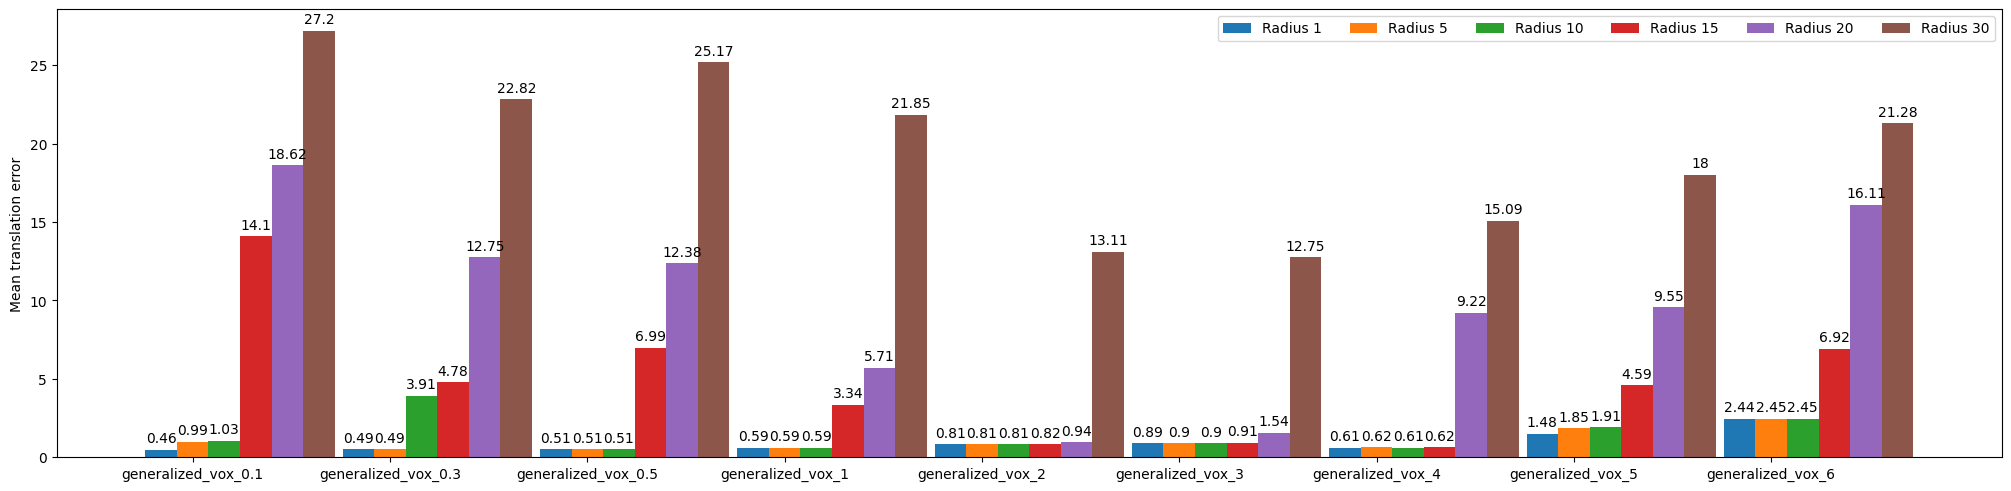

In [10]:
target = r"C:\Users\amoff\Documents\Meine Textdokumente\Masterarbeit\Daten\new_try\registered_pcds\intersection_drone_with_ground_registered.pcd"
source = r"C:\Users\amoff\Documents\Meine Textdokumente\Masterarbeit\Daten\new_try\registered_pcds\merged_vehicle_frames_kiss_icp_with_ground_registered.pcd"

source_original = o3d.io.read_point_cloud(source)
target_original = o3d.io.read_point_cloud(target)

print(len(source_original.points))
print(len(target_original.points))

voxel_size = 0.1
source_original = source_original.voxel_down_sample(voxel_size)
target_original = target_original.voxel_down_sample(voxel_size)

target_down, target_fpfh = None, None

# alx.draw_point_clouds([target,source])

max_correspondence_distance = 10
methods = ["generalized_vox_0.5","generalized_vox_1","generalized_vox_2","generalized_vox_4","generalized_vox_6"]
methods = ["generalized_vox_0.1","generalized_vox_0.3","generalized_vox_0.5","generalized_vox_1","generalized_vox_2","generalized_vox_3","generalized_vox_4","generalized_vox_5","generalized_vox_6"]
radii = [1, 5, 10, 15, 20, 30]
suffix = "with_ground_generalized_voxel_test"
df_translation = pd.DataFrame({"method":methods})
df_rotation = pd.DataFrame({"method":methods})

cache = {}
for radius in radii:
    t_errors = []
    r_errors = []
    for method in methods:
        voxel_size = float(method.split("_")[-1])
        source = source_original.voxel_down_sample(voxel_size)
        target = target_original.voxel_down_sample(voxel_size)
        print(f"{method} {radius}")
        t_error, r_error = calculate_mean_error(source, target, target_down, target_fpfh, voxel_size, method, cache=cache, radius = radius, max_correspondence_distance=max_correspondence_distance)
        t_errors.append(t_error)
        r_errors.append(r_error)
    df_translation["Radius " + str(radius)] = t_errors
    df_rotation["Radius " + str(radius)] = r_errors

date_time = datetime.now().strftime("%Y_%m_%d_%H_%M_%S")

translation_file_path = r"C:\Users\amoff\Documents\Meine Textdokumente\Masterarbeit\experiments\29\translation_error_"+date_time+"_"+suffix+".csv"
rotation_file_path = r"C:\Users\amoff\Documents\Meine Textdokumente\Masterarbeit\experiments\29\rotation_error_"+date_time+"_"+suffix+".csv"
df_translation.to_csv(translation_file_path)
df_rotation.to_csv(rotation_file_path)

generate_bar_plot_no_save(df_translation)

In [49]:
target = r"C:\Users\amoff\Documents\Meine Textdokumente\Masterarbeit\Daten\new_try\registered_pcds\intersection_drone_with_ground_registered.pcd"
source = r"C:\Users\amoff\Documents\Meine Textdokumente\Masterarbeit\Daten\new_try\registered_pcds\merged_vehicle_frames_kiss_icp_with_ground_registered.pcd"

source_original = o3d.io.read_point_cloud(source)
target_original = o3d.io.read_point_cloud(target)

df_translation = pd.DataFrame(columns = ["Voxel size", "vehicle map", "drone map"])
df_translation.loc[0] = [0, len(source_original.points), len(target_original.points)]

for voxel_size in [0.1,0.3, 0.5, 1, 2, 3, 4, 5, 6]:
# for voxel_size in [0.5, 1, 2, 3, 4, 5, 6]:
    source = source_original.voxel_down_sample(voxel_size)
    target = target_original.voxel_down_sample(voxel_size)
    
    df_translation.loc[len(df_translation.index)] = [voxel_size, len(source.points), len(target.points)]
    print(len(source.points), len(target.points))
    
df_translation

3238936 1047629
618599 275905
249486 143237
70161 35091
20454 8323
10121 3694
6590 2353
4732 1183
3160 942


,Voxel size,vehicle map,drone map
0,0.0,3239041.0,9572933.0
1,0.1,3238936.0,1047629.0
2,0.3,618599.0,275905.0
3,0.5,249486.0,143237.0
4,1.0,70161.0,35091.0
5,2.0,20454.0,8323.0
6,3.0,10121.0,3694.0
7,4.0,6590.0,2353.0
8,5.0,4732.0,1183.0
9,6.0,3160.0,942.0


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


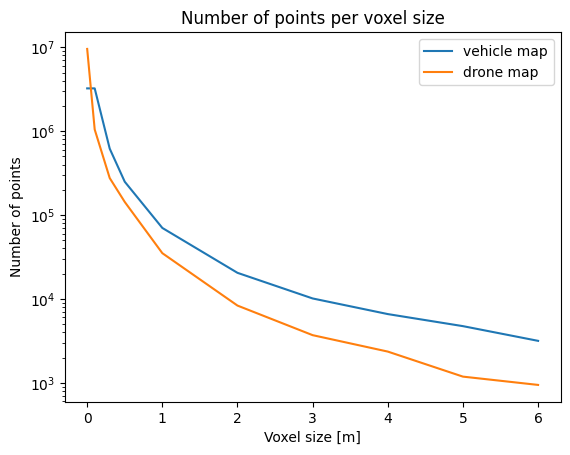

In [50]:
ax = df_translation.plot(x=0, ylabel="Number of points", title="Number of points per voxel size", xlabel="Voxel size [m]", logy=True)
fig = ax.get_figure()
fig.savefig(r"C:\Users\amoff\Documents\Meine Textdokumente\Masterarbeit\Images\experiments\number_of_points_per_voxel_size.eps", format='eps')

In [39]:
target = r"C:\Users\amoff\Documents\Meine Textdokumente\Masterarbeit\Daten\new_try\registered_pcds\intersection_drone_with_ground_registered.pcd"
source = r"C:\Users\amoff\Documents\Meine Textdokumente\Masterarbeit\Daten\new_try\registered_pcds\merged_vehicle_frames_kiss_icp_with_ground_registered.pcd"

source_original = o3d.io.read_point_cloud(source)
target_original = o3d.io.read_point_cloud(target)

voxel_size = 2

source = source_original.voxel_down_sample(voxel_size)
target = target_original.voxel_down_sample(voxel_size)

alx.draw_point_clouds([target, source])